In [1]:
import os
from numba import njit,jit
import numpy as np
from tqdm.notebook import tqdm as tqdmn # progress bar
import jax.numpy as jnp

import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("Blues_r",3)+['#D3D3D3','#808080'])

import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import matplotlib.colors
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 0.2 #set the value globally
mpl.rcParams['xtick.major.width'] = 0.3
mpl.rcParams['xtick.minor.width'] = 0.3
mpl.rcParams['ytick.major.width'] = 0.3
mpl.rcParams['ytick.minor.width'] = 0.3

from netCDF4 import Dataset
import scipy.stats as sp
import adsfunc as ads

fpath = os.path.join(rcParams["datapath"], "/Users/felixlangot/Library/Fonts/Cronos-Pro-Light_12448.ttf")
Csprop = fm.FontProperties(fname=fpath)
Cstitleprop = Csprop.copy()
Cslabelprop = Csprop.copy()
Cstitleprop.set_size(30)
Csprop.set_size(25)
Cslabelprop.set_size(25)

fpath2 = os.path.join(rcParams["datapath"], "/Users/felixlangot/Library/Fonts/MinionPro-Regular.otf")
Mpprop = fm.FontProperties(fname=fpath2)
Mptitleprop = Mpprop.copy()
Mplabelprop = Mpprop.copy()
Mptitleprop.set_size(30)
Mpprop.set_size(25)
Mplabelprop.set_size(15)

fpath3 = os.path.join(rcParams["datapath"], "/Users/felixlangot/Downloads/mnsymbol/tex/MnSymbol.sty")
Tgprop = fm.FontProperties(fname=fpath3)
Tgtitleprop = Tgprop.copy()
Tglabelprop = Tgprop.copy()
Tgtitleprop.set_size(30)
Tgprop.set_size(25)
Tglabelprop.set_size(15)

In [2]:
sns.color_palette("Blues_r", 3)

[(0.13042675893886968, 0.44415224913494805, 0.710326797385621),
 (0.42274509803921567, 0.684075355632449, 0.8398923490965013),
 (0.7786851211072664, 0.8602998846597462, 0.9379930795847751)]

# Means

In [3]:
%store

Stored variables and their in-db values:
RHpo                               -> array([[[0.09753071, 0.00406393, 0.0040157 , ..., 
RHpoU                              -> array([[[0.44275495, 0.38881698, 0.00397611, ..., 
RHpo_cyc                           -> array([[[0.00224838, 0.00217937, 0.00214676, ..., 
RHpo_cyc_NoU                       -> array([[[0.00638605, 0.00485351, 0.00633262, ..., 
RHpo_sqll                          -> array([[[0.72778189, 0.7401318 , 0.73906821, ..., 
Rh                                 -> array([0.80344116, 0.80550732, 0.79056104, ..., 0.
Rh3                                -> array([0.51301837, 0.45336441, 0.424267  , ..., 0.
Rh4                                -> array([0.71241462, 0.71886212, 0.72781068, ..., 0.
Rh5                                -> array([0.22382665, 0.22004469, 0.21990579, ..., 0.
Rhnlist                            -> array([array([0.80344116, 0.80550732, 0.79056104, 
iterl                              -> array([    0.,   100.,   200., 

In [7]:
%store -r meanRHplist_cumudt10
%store -r meanRHplist_cumu
%store -r meanRHplist_cumu_60hPa
%store -r meanRHplist_cyc_NoU
%store -r meanRHplist_cyc
%store -r meanRHplist_sqll

In [8]:
steplist = [1,3,6,12,24,48,96,144]
steplist2 = [1,2,4,8,16,32,48]
labelsRHcomp = ['Cumulonimubus dt=10min', 'Cumulonimbus','Cumulonimbus+U', 'Cyclone', 'Cyclone+U', 'Squall line']
interval = np.linspace(0, 1, len(labelsRHcomp))
colorlist = [mpl.cm.rainbow(i) for i in interval]

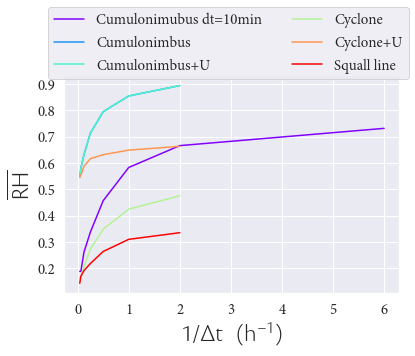

In [9]:
meanRHcomp = [meanRHplist_cumudt10, meanRHplist_cumu, meanRHplist_cumu_60hPa, meanRHplist_cyc_NoU, meanRHplist_cyc, meanRHplist_sqll]
plt.plot(1/(np.asarray(steplist)*1/6), meanRHplist_cumudt10, color=colorlist[0], label=labelsRHcomp[0])
for i in np.arange(1,len(meanRHcomp)):
    plt.plot(1/(np.asarray(steplist2)*1/2), meanRHcomp[i], color=colorlist[i], label = labelsRHcomp[i])
plt.xlabel('$\mathdefault{1/\Delta t~~(h^{-1})}$ ', fontproperties=Cslabelprop)
plt.ylabel(r'$\mathdefault{\overline{RH}}$', fontproperties=Cslabelprop)
#plt.xlim(25,0)
plt.xticks(font = Mplabelprop)
plt.yticks(font = Mplabelprop)
plt.legend(bbox_to_anchor=(1.05, 1.35), ncol=2, prop=Mplabelprop)
plt.savefig('Figs/meanRHscomp.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

In [10]:
%store -r Rhnlist
meanRhlist = []
for i in np.arange(len(Rhnlist)):
    meanRhlist.append(np.mean(Rhnlist[i]))
meanRHlist = [meanRHplist_cumudt10[0], meanRHplist_cumu_60hPa[0], meanRHplist_cyc_NoU[0], meanRHplist_cyc[0], meanRHplist_sqll[0]]

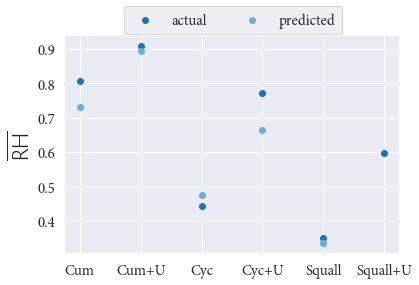

In [11]:
absc = [1,2,3,4,5,6]
absc2 = [1,2,3,4,5]
labels = ['Cum', 'Cum+U', 'Cyc', 'Cyc+U', 'Squall', 'Squall+U']
plt.scatter(absc, meanRhlist, label='actual')
plt.scatter(absc2, meanRHlist, label='predicted')
plt.xticks(absc, labels, font=Mplabelprop)
plt.yticks(font = Mplabelprop)
plt.legend(bbox_to_anchor=(0.85, 1.17), ncol=2, prop=Mplabelprop)
plt.ylabel(r'$\mathdefault{\overline{RH}}$', fontproperties=Cslabelprop)
plt.savefig('Figs/RHmuactualpred.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

In [12]:
steplist = [1,2,4,8,16,32,48]
steplist2 = [1,3,6,12,24,48,96,144]
nsampleslist = [10,10,8,9,9]
namelist = ['Cumu', 'Cumu_U', 'Cyc', 'Cyc_U', 'Sqll']
namelist2 = ['RHp', 'RHp_CumuUp', 'RHp_cyc_NoU', 'RHp_cyc', 'RHp_sqll']

In [13]:
for step in tqdmn(steplist):
    for name,name2,nsamples in zip(namelist,namelist2,nsampleslist):
        locals()['RHplist'+str(name)+str(step)] = np.zeros((nsamples, 128*128))
        locals()['RHplist'+str(name)+str(step)][0] = np.loadtxt('RHarrays/'+str(name2)+str(step)+'.txt').flatten()
        for i in np.arange(2,nsamples+1):
            locals()['RHplist'+str(name)+str(step)][i-1] = np.loadtxt('RHarrays/'+str(name2)+str(step)+'_'+str(i)+'.txt').flatten()
        locals()['RHplist'+str(name)+str(step)] = locals()['RHplist'+str(name)+str(step)].flatten()

for step in tqdmn(steplist2):
    locals()['RHplistCumuDt10'+str(step)] = np.zeros((nsamples, 128*128))
    locals()['RHplistCumuDt10'+str(step)][0] = np.loadtxt('RHarrays/RHp_dt10_'+str(step)+'.txt').flatten()
    for i in np.arange(2,nsamples+1):
        locals()['RHplistCumuDt10'+str(step)][i-1] = np.loadtxt('RHarrays/RHp_dt10_'+str(step)+'_'+str(i)+'.txt').flatten()
    locals()['RHplistCumuDt10'+str(step)] = locals()['RHplistCumuDt10'+str(step)].flatten()

In [14]:
np.shape(RHplistCyc_U1)

(147456,)

In [15]:
RHdatalist = [RHplistCumuDt101, RHplistCumu_U1, RHplistCyc1, RHplistCyc_U1, RHplistSqll1]
RHstdlist = []
for index in RHdatalist:
    RHstdlist.append(np.std(index))

Rhstdlist = []
for i in np.arange(len(Rhnlist)):
    Rhstdlist.append(np.std(Rhnlist[i]))

## Variabilité temporelle de la moyenne

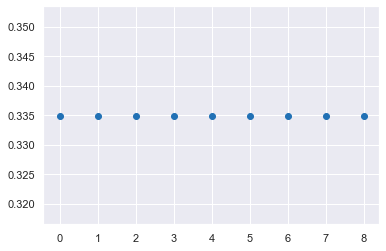

0.0


In [16]:
TEST = np.reshape(RHplistSqll1, (9,128*128))
TEST.shape
testmeanlst = []
for i in np.arange(len(TEST)):
    testmeanlst.append(np.mean(TEST[i]))
plt.scatter(np.arange(len(TEST)), testmeanlst)
plt.show()
print(np.std(testmeanlst))

In [17]:
labelsRHfit = ['Cumulonimbus', 'Cumulonimbus+U', 'Cyclone', 'Cyclone+U', 'Squall line']
colors = np.asarray(['darkred', 'r', 'g', 'lightgreen', 'b', 'skyblue'], dtype=object)

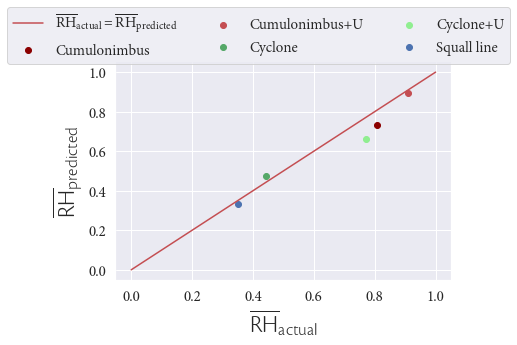

In [18]:
xx = [meanRhlist[0],meanRhlist[1], meanRhlist[2], meanRhlist[3],meanRhlist[4]]
yy = meanRHlist
for i in np.arange(len(xx)):
    plt.scatter(xx[i], yy[i], color = colors[i], label=labelsRHfit[i])
plt.plot(np.linspace(0,1,10),np.linspace(0,1,10), color='r', label=r'$\mathdefault{\overline{RH}_{actual} = \overline{RH}_{predicted}}$')
plt.xticks(font=Mplabelprop)
plt.yticks(font=Mplabelprop)
plt.legend(bbox_to_anchor=(1.2, 1.29), prop=Mplabelprop, ncol=3)
plt.xlabel(r'$\mathdefault{\overline{RH}_{actual}}$', fontproperties=Cslabelprop)
plt.ylabel(r'$\mathdefault{\overline{RH}_{predicted}}$', fontproperties=Cslabelprop)
plt.savefig('Figs/meanRHpvsRHa.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()          

# $\sigma$

## Convergence

In [44]:
stdRHplistCumudt10 = np.zeros(len(steplist2))
for step,i in zip(steplist2, np.arange(len(steplist2))):
    stdRHplistCumudt10[i] = np.std(locals()['RHplistCumuDt10'+str(step)])
for name in tqdmn(namelist):
    locals()['stdRHplist'+str(name)] = np.zeros(len(steplist))
    for step, i in zip(steplist, np.arange(len(steplist))):
        locals()['stdRHplist'+str(name)][i] = np.std(locals()['RHplist'+str(name)+str(step)])

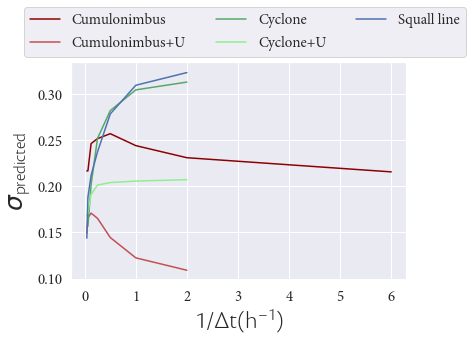

In [46]:
stdcomplist = [stdRHplistCumudt10, stdRHplistCumu_U, stdRHplistCyc, stdRHplistCyc_U, stdRHplistSqll]
plt.plot(1/(np.asarray(steplist2)*1/6), stdRHplistCumudt10, color = colors[0], label=labelsRHfit[0])
for i in np.arange(1,len(stdcomplist)):
    plt.plot(1/(np.asarray(steplist)*1/2), stdcomplist[i], color = colors[i], label=labelsRHfit[i])
plt.xticks(font=Mplabelprop)
plt.yticks(font=Mplabelprop)
plt.legend(bbox_to_anchor=(1.2, 1.29), prop=Mplabelprop, ncol=3)
plt.xlabel(r'$\mathdefault{1/\Delta t (h^{-1})}$', fontproperties=Cslabelprop)
plt.ylabel(r'$\sigma\mathdefault{_{predicted}}$', fontproperties=Cslabelprop)
plt.savefig('Figs/stdRHscomp.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

## Comparison

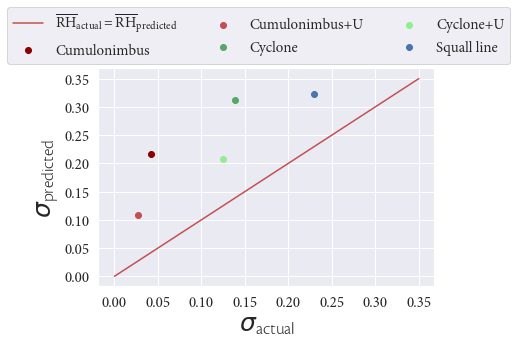

In [20]:
xxstd = [Rhstdlist[0],Rhstdlist[1], Rhstdlist[2], Rhstdlist[3],Rhstdlist[4]]
yystd = RHstdlist
for i in np.arange(len(xxstd)):
    plt.scatter(xxstd[i], yystd[i], color = colors[i], label=labelsRHfit[i])
plt.plot(np.linspace(0,0.35,10),np.linspace(0,0.35,10), color='r', label=r'$\mathdefault{\overline{RH}_{actual} = \overline{RH}_{predicted}}$')
plt.xticks(font=Mplabelprop)
plt.yticks(font=Mplabelprop)
plt.legend(bbox_to_anchor=(1.25, 1.32), prop=Mplabelprop, ncol=3)
plt.xlabel(r'$\sigma\mathdefault{_{actual}}$', fontproperties=Cslabelprop)
plt.ylabel(r'$\sigma\mathdefault{_{predicted}}$', fontproperties=Cslabelprop)
plt.savefig('Figs/stdRHpvsRHa.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

# Skewness

## Convergence

In [47]:
skewRHplistCumudt10 = np.zeros(len(steplist2))
for step,i in zip(steplist2, np.arange(len(steplist2))):
    skewRHplistCumudt10[i] = sp.skew(locals()['RHplistCumuDt10'+str(step)])
for name in tqdmn(namelist):
    locals()['skewRHplist'+str(name)] = np.zeros(len(steplist))
    for step, i in zip(steplist, np.arange(len(steplist))):
        locals()['skewRHplist'+str(name)][i] = sp.skew(locals()['RHplist'+str(name)+str(step)])

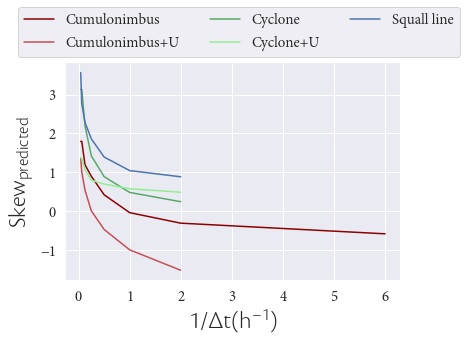

In [48]:
skewcomplist = [skewRHplistCumudt10, skewRHplistCumu_U, skewRHplistCyc, skewRHplistCyc_U, skewRHplistSqll]
plt.plot(1/(np.asarray(steplist2)*1/6), skewRHplistCumudt10, color = colors[0], label=labelsRHfit[0])
for i in np.arange(1,len(skewcomplist)):
    plt.plot(1/(np.asarray(steplist)*1/2), skewcomplist[i], color = colors[i], label=labelsRHfit[i])
plt.xticks(font=Mplabelprop)
plt.yticks(font=Mplabelprop)
plt.legend(bbox_to_anchor=(1.2, 1.29), prop=Mplabelprop, ncol=3)
plt.xlabel(r'$\mathdefault{1/\Delta t (h^{-1})}$', fontproperties=Cslabelprop)
plt.ylabel(r'$\mathdefault{Skew_{predicted}}$', fontproperties=Cslabelprop)
plt.savefig('Figs/skewRHscomp.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

## Comparison

In [21]:
RHskewlist = []
for index in RHdatalist:
    RHskewlist.append(sp.skew(index))

Rhskewlist = []
for i in np.arange(len(Rhnlist)):
    Rhskewlist.append(sp.skew(Rhnlist[i]))

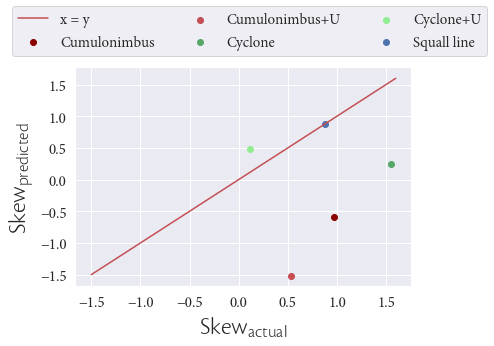

In [22]:
xxskew = [Rhskewlist[0],Rhskewlist[1], Rhskewlist[2], Rhskewlist[3], Rhskewlist[4]]
yyskew = RHskewlist
for i in np.arange(len(xxskew)):
    plt.scatter(xxskew[i], yyskew[i], color = colors[i], label=labelsRHfit[i])
plt.plot(np.linspace(-1.5,1.6,10),np.linspace(-1.5,1.6,10), color='r', label='x = y')
plt.xticks(font=Mplabelprop)
plt.yticks(font=Mplabelprop)
plt.legend(bbox_to_anchor=(1.25, 1.32), prop=Mplabelprop, ncol=3)
plt.xlabel(r'$\mathdefault{Skew_{actual}}$', fontproperties=Cslabelprop)
plt.ylabel(r'$\mathdefault{Skew_{predicted}}$', fontproperties=Cslabelprop)
plt.savefig('Figs/skewRHpvsRHa.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()